In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import seaborn as sns
sns.set_theme()
import itertools


In [2]:
scores_df=pd.read_csv("../lfe_score_cv_hd.csv")


In [3]:
def get_lfe(scores_df, lang_pairs=None):
    
    if not lang_pairs : 
        # lang_pairs = set(["-".join(sorted([x,y])) for x, y in zip(scores_df["test"], scores_df["train"])] )
        lang_pairs = set(["-".join(sorted([x,y])) for x, y in zip(scores_df["test"], scores_df["train"])] )
    
    lfe_scores = {}
    x=0
    for p in lang_pairs : 
        l_a = p.split("-")[0]
        l_b = p.split("-")[1]
        
        s_same = np.mean(scores_df[scores_df["langpair"] == p]["same"])
        s_diff = np.mean(scores_df[scores_df["langpair"] == p]["different"])
        lfe = (s_diff - s_same) / s_same
        
        lfe_scores[(p,x)] = lfe*100
        x+=1
    #return pd.DataFrame.from_dict(lfe_scores, orient='index')
    return lfe_scores, np.mean(list(lfe_scores.values()))
        
    
    # NEED TO ADD 0 

In [4]:
def get_permuted_probability(scores_df, n = 1000):
    lfe_permuted = []
    for x in tqdm(range(n)):
        l_rand = np.random.choice(scores_df.train.unique(), 9) # random sample 9
        lang_pairs = ['-'.join(sorted(p)) for p in itertools.combinations(l_rand,2)]

        scores_df_perm = pd.DataFrame(data=None, columns=scores_df.columns)
        for l in lang_pairs :
            l_a = l.split("-")[0]
            l_b = l.split("-")[1]
            
            if l not in list(scores_df["langpair"]): # if same name twice
                r =  {"langpair" :l, "train":l_a,"test":l_b,"same":100, "different" :100, "genus" : "na", "family":"na"}
                scores_df_perm = scores_df_perm.append(r, ignore_index=True) 
                scores_df_perm = scores_df_perm.append(r, ignore_index=True) 
            else : 
                r = scores_df[(scores_df["train"] == l_a) & (scores_df["test"] == l_b)]
                r2 = scores_df[(scores_df["train"] == l_b) & (scores_df["test"] == l_a)]

                scores_df_perm = scores_df_perm.append(pd.DataFrame(r), ignore_index=True)
                scores_df_perm = scores_df_perm.append(pd.DataFrame(r2), ignore_index=True)
                

        
        lfe_scores, avg_lfe = get_lfe(scores_df_perm, lang_pairs)
        
        lfe_permuted.append(avg_lfe)
    return lfe_permuted

In [8]:
 lfe_permuted = get_permuted_probability(scores_df, n = 10000)

100%|█████████████████████████████████████| 10000/10000 [48:01<00:00,  3.47it/s]


CI : [2.708,18.545]


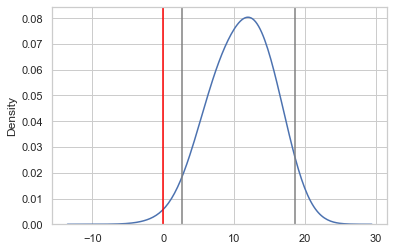

In [9]:
plt.figure()
sns.set_style('whitegrid')
sns.kdeplot(np.array(lfe_permuted), bw=0.5)
boot_conf_min = np.percentile(lfe_permuted,2.5)
boot_conf_max = np.percentile(lfe_permuted,97.5)

plt.axvline(x=0, color="red")
plt.axvline(x=boot_conf_min, color="grey")
plt.axvline(x=boot_conf_max, color="grey")
print("CI : [{},{}]".format( round(boot_conf_min,3), round(boot_conf_max,3)))
#sns.kdeplot(np.array(data_boot), bw=0.5)


CI : [-0.352,20.239]


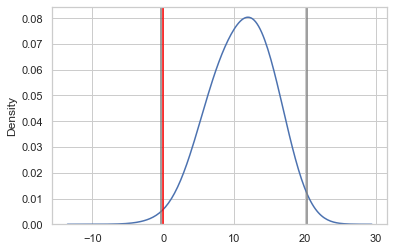

In [10]:
plt.figure()
sns.set_style('whitegrid')
sns.kdeplot(np.array(lfe_permuted), bw=0.5)
boot_conf_min = np.percentile(lfe_permuted,0.5)
boot_conf_max = np.percentile(lfe_permuted,99.5)

plt.axvline(x=0, color="red")
plt.axvline(x=boot_conf_min, color="grey")
plt.axvline(x=boot_conf_max, color="grey")
print("CI : [{},{}]".format( round(boot_conf_min,3), round(boot_conf_max,3)))
#sns.kdeplot(np.array(data_boot), bw=0.5)


In [227]:
lfe_scores, avg_lfe = get_lfe(scores_df_perm)
lfe_scores

{('cy-de', 0): -17.196531791907518,
 ('fr-it', 1): 2.5581395348837286,
 ('cy-rw', 2): 22.305764411027567,
 ('ca-en', 3): 5.8327788866710994,
 ('de-it', 4): -1.9277108433734955,
 ('ca-cy', 5): 8.341206640572256,
 ('rw-rw', 6): 0.0,
 ('cy-fr', 7): 12.880886426592792,
 ('ca-rw', 8): 24.743762294233342,
 ('de-fr', 9): 13.122171945701359,
 ('ca-de', 10): 12.562377956172718,
 ('de-de', 11): 0.0,
 ('de-en', 12): 0.4975124378109568,
 ('ca-it', 13): 3.094777562862672,
 ('cy-en', 14): -8.79765395894429,
 ('en-rw', 15): 30.6504961411246,
 ('cy-it', 16): 3.2432432432432377,
 ('en-it', 17): 15.12195121951222,
 ('en-fr', 18): 16.898148148148138,
 ('de-rw', 19): 43.402399127590016,
 ('it-rw', 20): 27.940074906367013,
 ('fr-rw', 21): 28.61668426610347,
 ('ca-fr', 22): 23.630067223467105}

In [97]:
lfe_scores, avg_lfe = get_lfe(scores_df_perm)
avg_lfe 

9.60795667334921

In [ ]:
### NOW DO FOR LANGPAIR

In [251]:
scores_df[scores_df["family"] == "same"]

,langpair,train,test,same,different,genus,family
0,ca-cy,cy,ca,4.860,2.860,different,same
1,ca-de,de,ca,2.060,2.580,different,same
2,ca-en,en,ca,1.960,2.980,different,same
3,ca-fa,fa,ca,3.320,3.480,different,same
4,ca-fr,fr,ca,2.360,2.820,same,same
5,ca-it,it,ca,6.240,2.910,same,same
8,ca-cy,ca,cy,2.549,5.167,different,same
9,cy-de,de,cy,2.060,3.730,different,same
10,cy-en,en,cy,1.960,4.430,different,same
11,cy-fa,fa,cy,3.320,5.120,different,same


In [292]:
n=10000
diff=[]
same=[]
for x in tqdm(range(n)):
    diff_scores = scores_df[scores_df["family"] == "different"]
    _, diff_avg_lfe = get_lfe(diff_scores.sample( len(diff_scores), replace = True))
    diff.append(diff_avg_lfe)

    same_scores = scores_df[scores_df["family"] == "same"]
    _, same_avg_lfe = get_lfe(same_scores.sample( len(same_scores), replace = True))
    same.append(same_avg_lfe)
    #print(diff_avg_lfe, same_avg_lfe)
    
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:15<00:00, 132.00it/s]


In [290]:
same_scores.sample( len(same_scores), replace = True)

,langpair,train,test,same,different,genus,family
24,ca-en,ca,en,2.549,1.792,different,same
29,en-it,it,en,6.240,3.370,different,same
8,ca-cy,ca,cy,2.549,5.167,different,same
3,ca-fa,fa,ca,3.320,3.480,different,same
0,ca-cy,cy,ca,4.860,2.860,different,same
44,fa-fr,fa,fr,3.320,3.160,different,same
19,de-fa,fa,de,3.320,2.270,different,same
9,cy-de,de,cy,2.060,3.730,different,same
35,en-fa,en,fa,1.960,3.000,different,same
3,ca-fa,fa,ca,3.320,3.480,different,same


<AxesSubplot:ylabel='Density'>

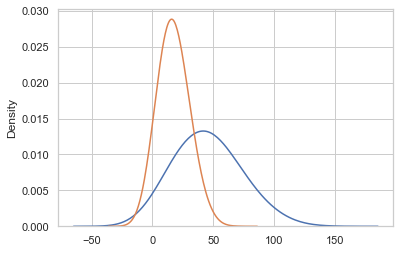

In [284]:
plt.figure()
sns.set_style('whitegrid')
sns.kdeplot(np.array(diff), bw=0.5)
sns.kdeplot(np.array(same), bw=0.5)

#boot_conf_min = np.percentile(lfe_permuted,2.5)
#boot_conf_max = np.percentile(lfe_permuted,97.5)

#plt.axvline(x=0, color="red")
#plt.axvline(x=boot_conf_min, color="grey")
#plt.axvline(x=boot_conf_max, color="grey")
#print("CI : [{},{}]".format( round(boot_conf_min,3), round(boot_conf_max,3)))
#sns.kdeplot(np.array(data_boot), bw=0.5)


In [260]:
lfe_scores

{('en-kab', 0): 155.10204081632654,
 ('fr-kab', 1): 16.100443131462335,
 ('de-rw', 2): -61.46272855133614,
 ('cy-kab', 3): 12.40560949298814,
 ('it-kab', 4): -11.217948717948719,
 ('fa-rw', 5): 174.09638554216866,
 ('kab-rw', 6): -17.299578059071735,
 ('it-rw', 7): 73.5576923076923,
 ('de-kab', 8): -3.8040345821325676,
 ('ca-rw', 9): -20.64575568491143,
 ('fr-rw', 10): -55.9774964838256,
 ('en-rw', 11): -71.16736990154712,
 ('fa-kab', 12): 71.98795180722892}

In [295]:
scores_df[~scores_df["train"].isin(["kab", "rw"])].train.unique()

array(['cy', 'de', 'en', 'fa', 'fr', 'it', 'ca'], dtype=object)

In [304]:
        l_rand = list(np.random.choice(scores_df[~scores_df["train"].isin(["kab", "rw"])].train.unique(), 7)) # random sample 9
        l_rand.append("kab")
        l_rand.append("rw")
        l_rand

['de', 'de', 'it', 'de', 'de', 'cy', 'fr', 'kab', 'rw']

In [302]:
l_rand

['en', 'cy', 'fa', 'cy', 'fr', 'cy', 'ca', 'kab']

In [311]:
def get_permuted_probability_fam(scores_df, n = 1000):
    lfe_permuted = []
    
    
    for x in tqdm(range(n)):
        #l_rand = np.random.choice(scores_df.train.unique(), 9) # random sample 9
        l_rand = list(np.random.choice(scores_df[~scores_df["train"].isin(["kab", "rw"])].train.unique(), 7)) # random sample 9
        l_rand.append("kab")
        l_rand.append("rw")
        
        lang_pairs = ['-'.join(sorted(p)) for p in itertools.combinations(l_rand,2)]

        scores_df_perm = pd.DataFrame(data=None, columns=scores_df.columns)
        for l in lang_pairs :
            l_a = l.split("-")[0]
            l_b = l.split("-")[1]
            
            if l not in list(scores_df["langpair"]): # if same name twice
                r =  {"langpair" :l, "train":l_a,"test":l_b,"same":100, "different" :100, "genus" : "na", "family":"na"}
                scores_df_perm = scores_df_perm.append(r, ignore_index=True) 
                scores_df_perm = scores_df_perm.append(r, ignore_index=True) 
            else : 
                r = scores_df[(scores_df["train"] == l_a) & (scores_df["test"] == l_b)]
                r2 = scores_df[(scores_df["train"] == l_b) & (scores_df["test"] == l_a)]

                scores_df_perm = scores_df_perm.append(pd.DataFrame(r), ignore_index=True)
                scores_df_perm = scores_df_perm.append(pd.DataFrame(r2), ignore_index=True)
                

        
        diff_scores = scores_df_perm[scores_df_perm["family"] == "different"]
        _, diff_avg_lfe = get_lfe(diff_scores)
        same_scores = scores_df_perm[scores_df_perm["family"] == "same"]
        _, same_avg_lfe = get_lfe(same_scores)
        
        family_pair_diff = diff_avg_lfe - same_avg_lfe
        
        lfe_permuted.append(family_pair_diff)
    return lfe_permuted

In [316]:
 lfe_permuted = get_permuted_probability_fam(scores_df, n = 1000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:35<00:00,  3.63it/s]


CI : [8.552,24.606]


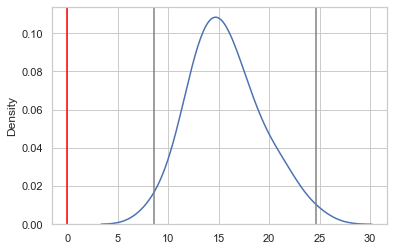

In [315]:
plt.figure()
sns.set_style('whitegrid')
sns.kdeplot(np.array(lfe_permuted), bw=0.5)
boot_conf_min = np.percentile(lfe_permuted,0.5)
boot_conf_max = np.percentile(lfe_permuted,99.5)

plt.axvline(x=0, color="red")
plt.axvline(x=boot_conf_min, color="grey")
plt.axvline(x=boot_conf_max, color="grey")
print("CI : [{},{}]".format( round(boot_conf_min,3), round(boot_conf_max,3)))
#sns.kdeplot(np.array(data_boot), bw=0.5)
